In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/label_encoded_data.csv")
df.sample(4)

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Fraud_indicator,state_code
1468,4,0,1,120,120,1,6
4362,0,0,0,300,300,1,3
2512,4,0,1,160,160,1,6
3710,3,0,0,150,150,1,6


# Model Training
- since it is classification problem 
- we will apply classigication wali algorithms 
- logistic refgression
- random forest
- KNN
- Gradient Boosting

In [7]:
x = df.drop(columns="Fraud_indicator")
y = df["Fraud_indicator"]

In [8]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
print("X train shape : ", X_train.shape)
print("X test shape : ", X_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape : ", y_test.shape)

X train shape :  (3500, 6)
X test shape :  (1500, 6)
y train shape :  (3500,)
y test shape :  (1500,)


# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model

LogisticRegression()

In [11]:
# fit the model
lr_model.fit(X_train, y_train)

c:\Users\GAURAV MAURYA\Desktop\FastagProjectMinor\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#predit 
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1500,))

#### model Evaluation

In [13]:
#import libraries for matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [14]:
#function to evaluate model
def evaluate_model(model, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy : ", accuracy)
    print("\nConfusion Matrix : \n", conf_matrix)
    print("\nPrecision : ", precision)
    print("\nRecall : ", recall)
    print("\nF1 Score : ", f1)

In [15]:
evaluate_model(lr_model, y_test, y_pred)

Accuracy :  0.98

Confusion Matrix : 
 [[ 297   30]
 [   0 1173]]

Precision :  0.9750623441396509

Recall :  1.0

F1 Score :  0.9873737373737373


# Decision Tree 

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
tree_model = DecisionTreeClassifier()
tree_model

DecisionTreeClassifier()

In [18]:
tree_model.fit(X_train, y_train)

y_tree_pred = tree_model.predict(X_test)
y_tree_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1500,))

In [19]:
evaluate_model(tree_model, y_test, y_tree_pred)

Accuracy :  0.9993333333333333

Confusion Matrix : 
 [[ 326    1]
 [   0 1173]]

Precision :  0.9991482112436116

Recall :  1.0

F1 Score :  0.9995739241585002


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model

RandomForestClassifier()

In [22]:
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1500,))

In [23]:
evaluate_model(rf_model, y_test, y_rf_pred)

Accuracy :  0.998

Confusion Matrix : 
 [[ 324    3]
 [   0 1173]]

Precision :  0.9974489795918368

Recall :  1.0

F1 Score :  0.9987228607918263


# Support Vector Machine

In [24]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model

SVC()

In [25]:
svc_model.fit(X_train, y_train)

y_svc_pred = svc_model.predict(X_test)
y_svc_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1500,))

In [26]:
evaluate_model(svc_model, y_test, y_svc_pred)

Accuracy :  0.9793333333333333

Confusion Matrix : 
 [[ 296   31]
 [   0 1173]]

Precision :  0.9742524916943521

Recall :  1.0

F1 Score :  0.9869583508624317


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn_model.fit(X_train, y_train)

y_knn_pred = knn_model.predict(X_test)
y_knn_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1500,))

In [29]:
evaluate_model(knn_model, y_test, y_knn_pred)

Accuracy :  0.998

Confusion Matrix : 
 [[ 324    3]
 [   0 1173]]

Precision :  0.9974489795918368

Recall :  1.0

F1 Score :  0.9987228607918263


# Model Comparision

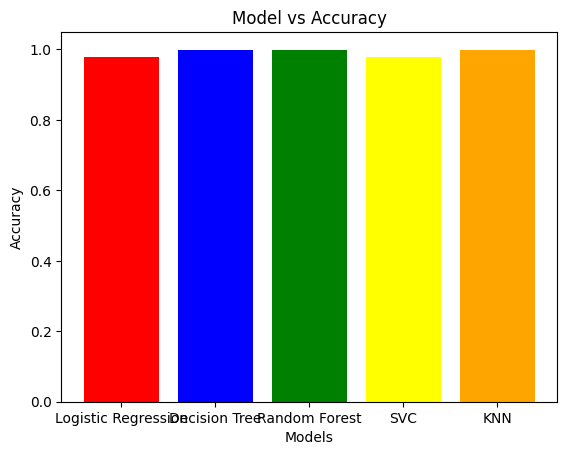

In [30]:
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVC", "KNN"]
accuracy_scores = [0.98, 0.9993333333333333, 0.998, 0.9793333333333333,  0.998]
colors = ["red", "blue", "green", "yellow", "orange"]
plt.bar(models, accuracy_scores, color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracy") 
plt.title("Model vs Accuracy")
plt.show()

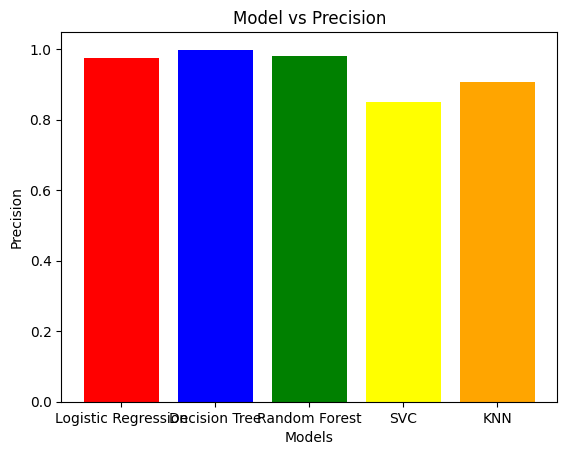

In [31]:
# Visualise the Precision, Recall and F1 Score
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVC", "KNN"]
precision_scores = [0.9750623441396509, 0.9982978723404256, 0.9799498746867168, 0.8487698986975398, 0.9064465408805031]
colors = ["red", "blue", "green", "yellow", "orange"]
plt.bar(models, precision_scores, color=colors)
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Model vs Precision")
plt.show()

# Conclusion 
- Decision Tree => => overall top performing model 

# Downloading the model

In [32]:
import joblib
import os

In [33]:
# Define the categorical values
categorical_values = {
    'Vehicle_Type': ['Bus', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
    'Lane_Type': ['Express', 'Regular'],
    'Vehicle_Dimensions': ['Large', 'Small', 'Medium'],
    'state_code': ['KA', 'MH', 'TN', 'AP', 'DL', 'UP']
}

In [34]:
joblib.dump(tree_model, '../models/tree_model.pkl')

['../models/tree_model.pkl']